<a href="https://colab.research.google.com/github/MTSAHU/MNIST-Neural-Networks-DL/blob/main/Copy_of_Amit's_BasicCNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9023 - loss: 0.3321 - val_accuracy: 0.9842 - val_loss: 0.0527
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0507 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9877 - val_loss: 0.0428
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9918 - val_loss: 0.0330
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9903 - val_loss: 0.0377


In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0404

Test Accuracy: 0.9892


In [ ]:
# Predict labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Classification report: Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.97      1.00      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



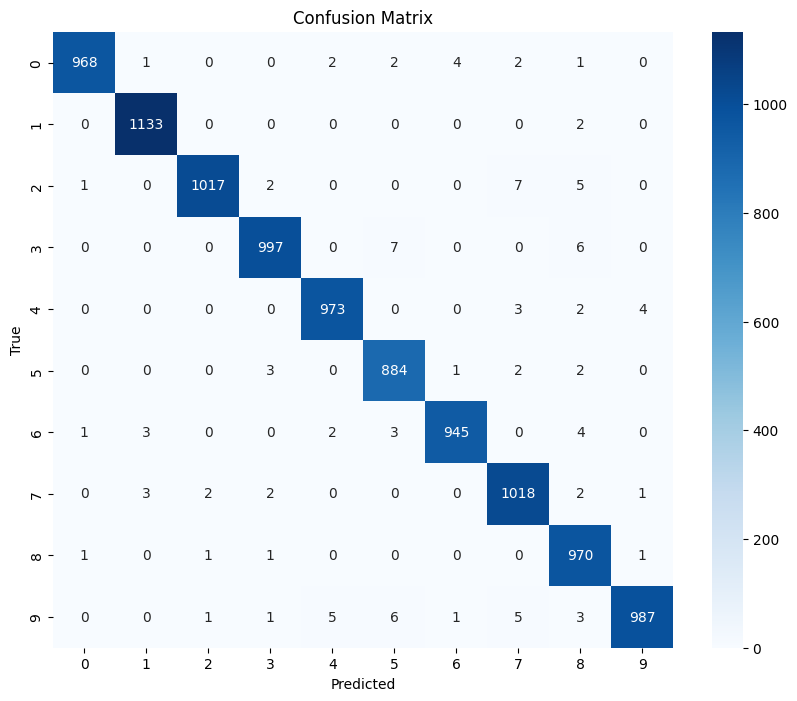

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

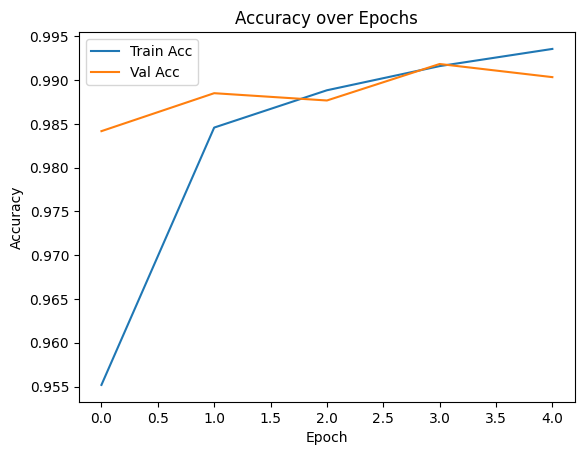

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

--- Data Preprocessing ---
Original Training image shape: (60000, 28, 28, 1)
Original Test image shape: (10000, 28, 28, 1)
Original Training data type: float32

After Normalization:
Normalized Training data type: float32

After Reshaping:
Reshaped Training image shape: (60000, 28, 28, 1)
Reshaped Test image shape: (10000, 28, 28, 1)

--- Data Preprocessing Complete ---

--- Designing the CNN Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


--- CNN Model Design Complete ---

--- Training the Model ---
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4384 - loss: 1.5647 - val_accuracy: 0.9097 - val_loss: 0.3180
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8915 - loss: 0.3525 - val_accuracy: 0.9415 - val_loss: 0.2122
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9263 - loss: 0.2416 - val_accuracy: 0.9575 - val_loss: 0.1613
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9449 - loss: 0.1822 - val_accuracy: 0.9700 - val_loss: 0.1182
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9566 - loss: 0.1474 - val_accuracy: 0.9740 - val_loss: 0.1047

--- Model Training Complete ---

--- Evaluating the Model ---
313/313 - 1s - 2ms/step - accuracy: 0.9651 - loss: 0.1158

Test Accuracy: 0.9651
Test Loss: 0.1158
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

          

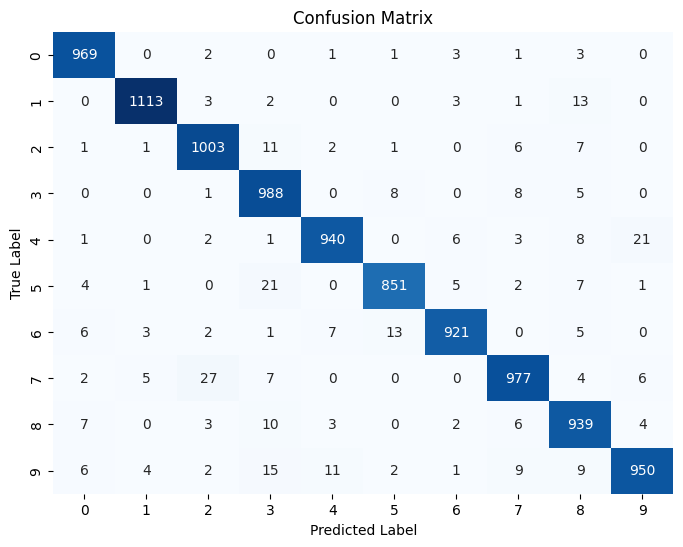


--- Model Evaluation Complete ---

--- Visualizing Performance ---


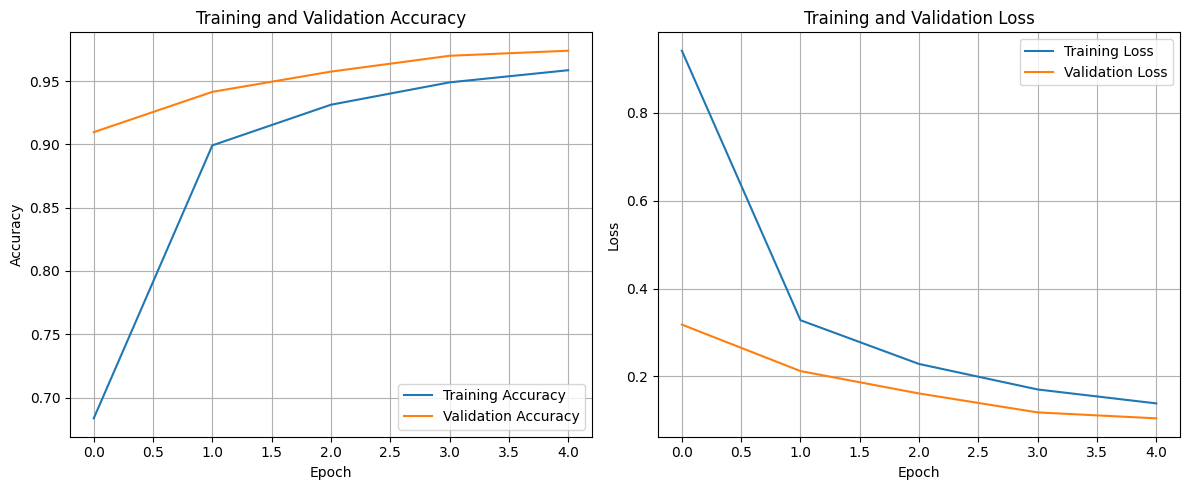


--- Performance Visualization Complete ---

PROJECT COMPLETION CHECKLIST:
- Data Download & Preprocessing: COMPLETE
- CNN Design: COMPLETE
- Model Training: COMPLETE
- Model Evaluation: COMPLETE (Includes Test Acc/Loss, Classification Report, Confusion Matrix Plot)
- Performance Visualization: COMPLETE (Includes Training/Validation Accuracy & Loss Plots)

Congratulations! You have successfully completed the MNIST Digit Classification Project.


In [ ]:
# Assuming you've just run:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# And you've already imported necessary libraries like tensorflow, numpy.

print("--- Data Preprocessing ---")

print(f"Original Training image shape: {x_train.shape}")
print(f"Original Test image shape: {x_test.shape}")
print(f"Original Training data type: {x_train.dtype}")

# 1. Normalize pixel values to the range [0, 1]
# Convert to float32 and divide by 255.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("\nAfter Normalization:")
print(f"Normalized Training data type: {x_train.dtype}")
# Note: Shape remains the same after normalization.

# 2. Reshape images to match the CNN input format: (batch_size, height, width, channels)
# For grayscale images (like MNIST), the channel dimension is 1.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("\nAfter Reshaping:")
print(f"Reshaped Training image shape: {x_train.shape}")
print(f"Reshaped Test image shape: {x_test.shape}")

print("\n--- Data Preprocessing Complete ---")

# --- Design the CNN ---
# (This is the next major section from your assignment document)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("\n--- Designing the CNN Model ---")
model = Sequential([
    # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    # input_shape is specified for the first layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling Layer 1: 2x2 pool size
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2: 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling Layer 2: 2x2 pool size
    MaxPooling2D((2, 2)),

    # Flatten Layer: Converts the 2D feature maps into a 1D vector
    Flatten(),

    # Dense Layer (Fully Connected): 64 units, ReLU activation
    Dense(64, activation='relu'),

    # Output Layer: 10 units (for 10 digits 0-9), Softmax activation for multi-class classification
    Dense(10, activation='softmax')
])

# Print the model summary to see the layers, output shapes, and parameter counts
model.summary()
print("\n--- CNN Model Design Complete ---")


# --- Train the Model ---
# (This is the next major section from your assignment document)

print("\n--- Training the Model ---")
# Compile the model
# Optimizer: Adam is a popular choice for deep learning models
# Loss Function: SparseCategoricalCrossentropy is used because y_train/y_test are integer labels
# Metrics: 'accuracy' will be tracked during training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# epochs: Number of times the model will iterate over the entire training dataset (set to 5 as per assignment)
# validation_split: 10% of the training data will be used for validation (monitored during training)
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.1) # 10% of training data for validation
print("\n--- Model Training Complete ---")


# --- Evaluate the Model ---
# (This is the next major section from your assignment document)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np # Already imported, but good to ensure

print("\n--- Evaluating the Model ---")
# Evaluate the trained model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2) # verbose=2 shows loss/accuracy at end

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions for the test set to calculate detailed metrics
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class labels (0-9)

# Report Classification (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("\n--- Model Evaluation Complete ---")


# --- Visualize Performance ---
# (This is the final major section from your assignment document)

import matplotlib.pyplot as plt # Already imported, but good to ensure

print("\n--- Visualizing Performance ---")
# Plot training and validation accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss curves
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

print("\n--- Performance Visualization Complete ---")
print("\nPROJECT COMPLETION CHECKLIST:")
print("- Data Download & Preprocessing: COMPLETE")
print("- CNN Design: COMPLETE")
print("- Model Training: COMPLETE")
print("- Model Evaluation: COMPLETE (Includes Test Acc/Loss, Classification Report, Confusion Matrix Plot)")
print("- Performance Visualization: COMPLETE (Includes Training/Validation Accuracy & Loss Plots)")
print("\nCongratulations! You have successfully completed the MNIST Digit Classification Project.")